# Python для сбора и анализа данных

*Алла Тамбовцева*

## Практикум 7.1. Управление браузером с Selenium: динамические таблицы

Импортируем необходимые модули и коллекции методов для сбора и обработки данных:

In [1]:
import pandas as pd

from bs4 import BeautifulSoup
from time import sleep

from selenium import webdriver as wd
from selenium.webdriver.common.by import By

Сохраняем ссылку на страницу со статистикой по футбольным матчам в переменную `url` (специально выбран довольно специфический ресурс, с кучей лишних окон, картинок и рекламы, которые потенциально могут мешать):

In [2]:
url = "https://1xbet.whoscored.com/Statistics"
print(url)

https://1xbet.whoscored.com/Statistics


Открываем новое окно браузера через Selenium и переходим на страницу по ссылке `url`:

In [3]:
br = wd.Chrome()
br.maximize_window()
br.get(url)

### Задача 1

Извлеките исходный код страницы и найдите в нём первую таблицу с результатами. Преобразуйте её в полноценный датафрейм pandas.

In [6]:
html = br.page_source
soup = BeautifulSoup(html)

In [7]:
# поиск по тэгу table с id равным top-team-stats-summary-grid

tab = soup.find("table", {"id" : "top-team-stats-summary-grid"})

In [8]:
# превращаем фрагмент HTML в строк, тип str

# строку с кодом HTML для таблицы в тэгах <table></table>
# обрабытываем через pandas и получаем список датафремов 
# с единственной таблицей внутри

df = pd.read_html(str(tab))[0]

In [9]:
df

,Team,Tournament,Goals,Shots pg,Discipline,Possession%,Pass%,AerialsWon,Rating
0,1. Bayer Leverkusen,Bundesliga,69,18.4,490,63.4,88.9,11.0,6.97
1,2. Bayern Munich,Bundesliga,80,19.9,422,62.2,88.6,12.6,6.97
2,3. Paris Saint-Germain,Ligue 1,65,15.0,423,65.4,89.6,7.9,6.94
3,4. Manchester City,Premier League,71,18.0,482,65.9,90.2,9.1,6.93
4,5. Real Madrid,LaLiga,66,16.1,544,59.5,90.1,8.7,6.89
5,6. Inter,Serie A,75,15.8,420,56.3,87.3,14.4,6.88
6,7. Liverpool,Premier League,72,20.3,565,60.7,85.5,15.9,6.87
7,8. Arsenal,Premier League,75,16.7,462,60.1,87.0,13.4,6.85
8,9. Barcelona,LaLiga,61,15.7,682,65.0,88.4,12.8,6.83
9,10. VfB Stuttgart,Bundesliga,64,15.6,431,60.0,86.4,13.9,6.82


In [10]:
# смотрим на число строк и столбцов

print(df.shape)

(20, 9)


### Задача 2

Напишите функцию `get_table()`, которая принимает на вход объект `br` и возвращает датафрейм с результатами из первой таблицы на странице.

In [11]:
def get_table(br):
    html = br.page_source
    soup = BeautifulSoup(html)
    tab = soup.find("table", 
          {"id" : "top-team-stats-summary-grid"})
    df = pd.read_html(str(tab))[0]
    return df

### Задача 3

Напишите программу, которая пролистывает все страницы в первой таблице и сохраняет все данные из нее в датафрейм pandas.

In [13]:
# находим элемент по его ID
button_next = br.find_element(By.ID, "next")

In [14]:
# смотрим на код этого элемента – проверяем, что нашли
print(button_next.get_attribute("outerHTML"))

<a class="option  clickable " id="next" data-page="1">next</a>


In [15]:
# while True: исполняем код, пока не столкнемся с выходом из цикла break
# а столкнемся мы с ним тогда, когда не будет выполняться условие в if
# условие проверяет, правда ли у элемента button_next в атрибуте class
# указано значение option  clickable 
# –> кнопка для листания кликабельна, дальше есть, куда листать

tables = []
while True:
    res = get_table(br)
    tables.append(res)
    button_next = br.find_element(By.ID, "next")
    if button_next.get_dom_attribute("class") == "option  clickable ":
        button_next.click()
        sleep(3)
    else:
        break

In [16]:
# concat(): склеивает датафреймы в списке в один датафрейм
# выводим первые несколько строк

fin = pd.concat(tables)
fin.head()

,Team,Tournament,Goals,Shots pg,Discipline,Possession%,Pass%,AerialsWon,Rating
0,1. Bayer Leverkusen,Bundesliga,69,18.4,490,63.4,88.9,11.0,6.97
1,2. Bayern Munich,Bundesliga,80,19.9,422,62.2,88.6,12.6,6.97
2,3. Paris Saint-Germain,Ligue 1,65,15.0,423,65.4,89.6,7.9,6.94
3,4. Manchester City,Premier League,71,18.0,482,65.9,90.2,9.1,6.93
4,5. Real Madrid,LaLiga,66,16.1,544,59.5,90.1,8.7,6.89


In [17]:
# проверяем содержимое
# все 96 строк собраны, типы корректные

fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 15
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Team         96 non-null     object 
 1   Tournament   96 non-null     object 
 2   Goals        96 non-null     int64  
 3   Shots pg     96 non-null     float64
 4   Discipline   96 non-null     int64  
 5   Possession%  96 non-null     float64
 6   Pass%        96 non-null     float64
 7   AerialsWon   96 non-null     float64
 8   Rating       96 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 7.5+ KB


### Задача 4

Постройте диаграмму рассеивания для визуализации связи между `Goals` и `Pass%`.

In [18]:
from matplotlib import pyplot as plt

In [19]:
# забираем из столбцов значения в виде массивов

x = fin["Goals"].values
y = fin["Pass%"].values

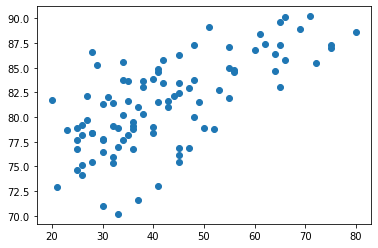

In [20]:
plt.scatter(x, y);

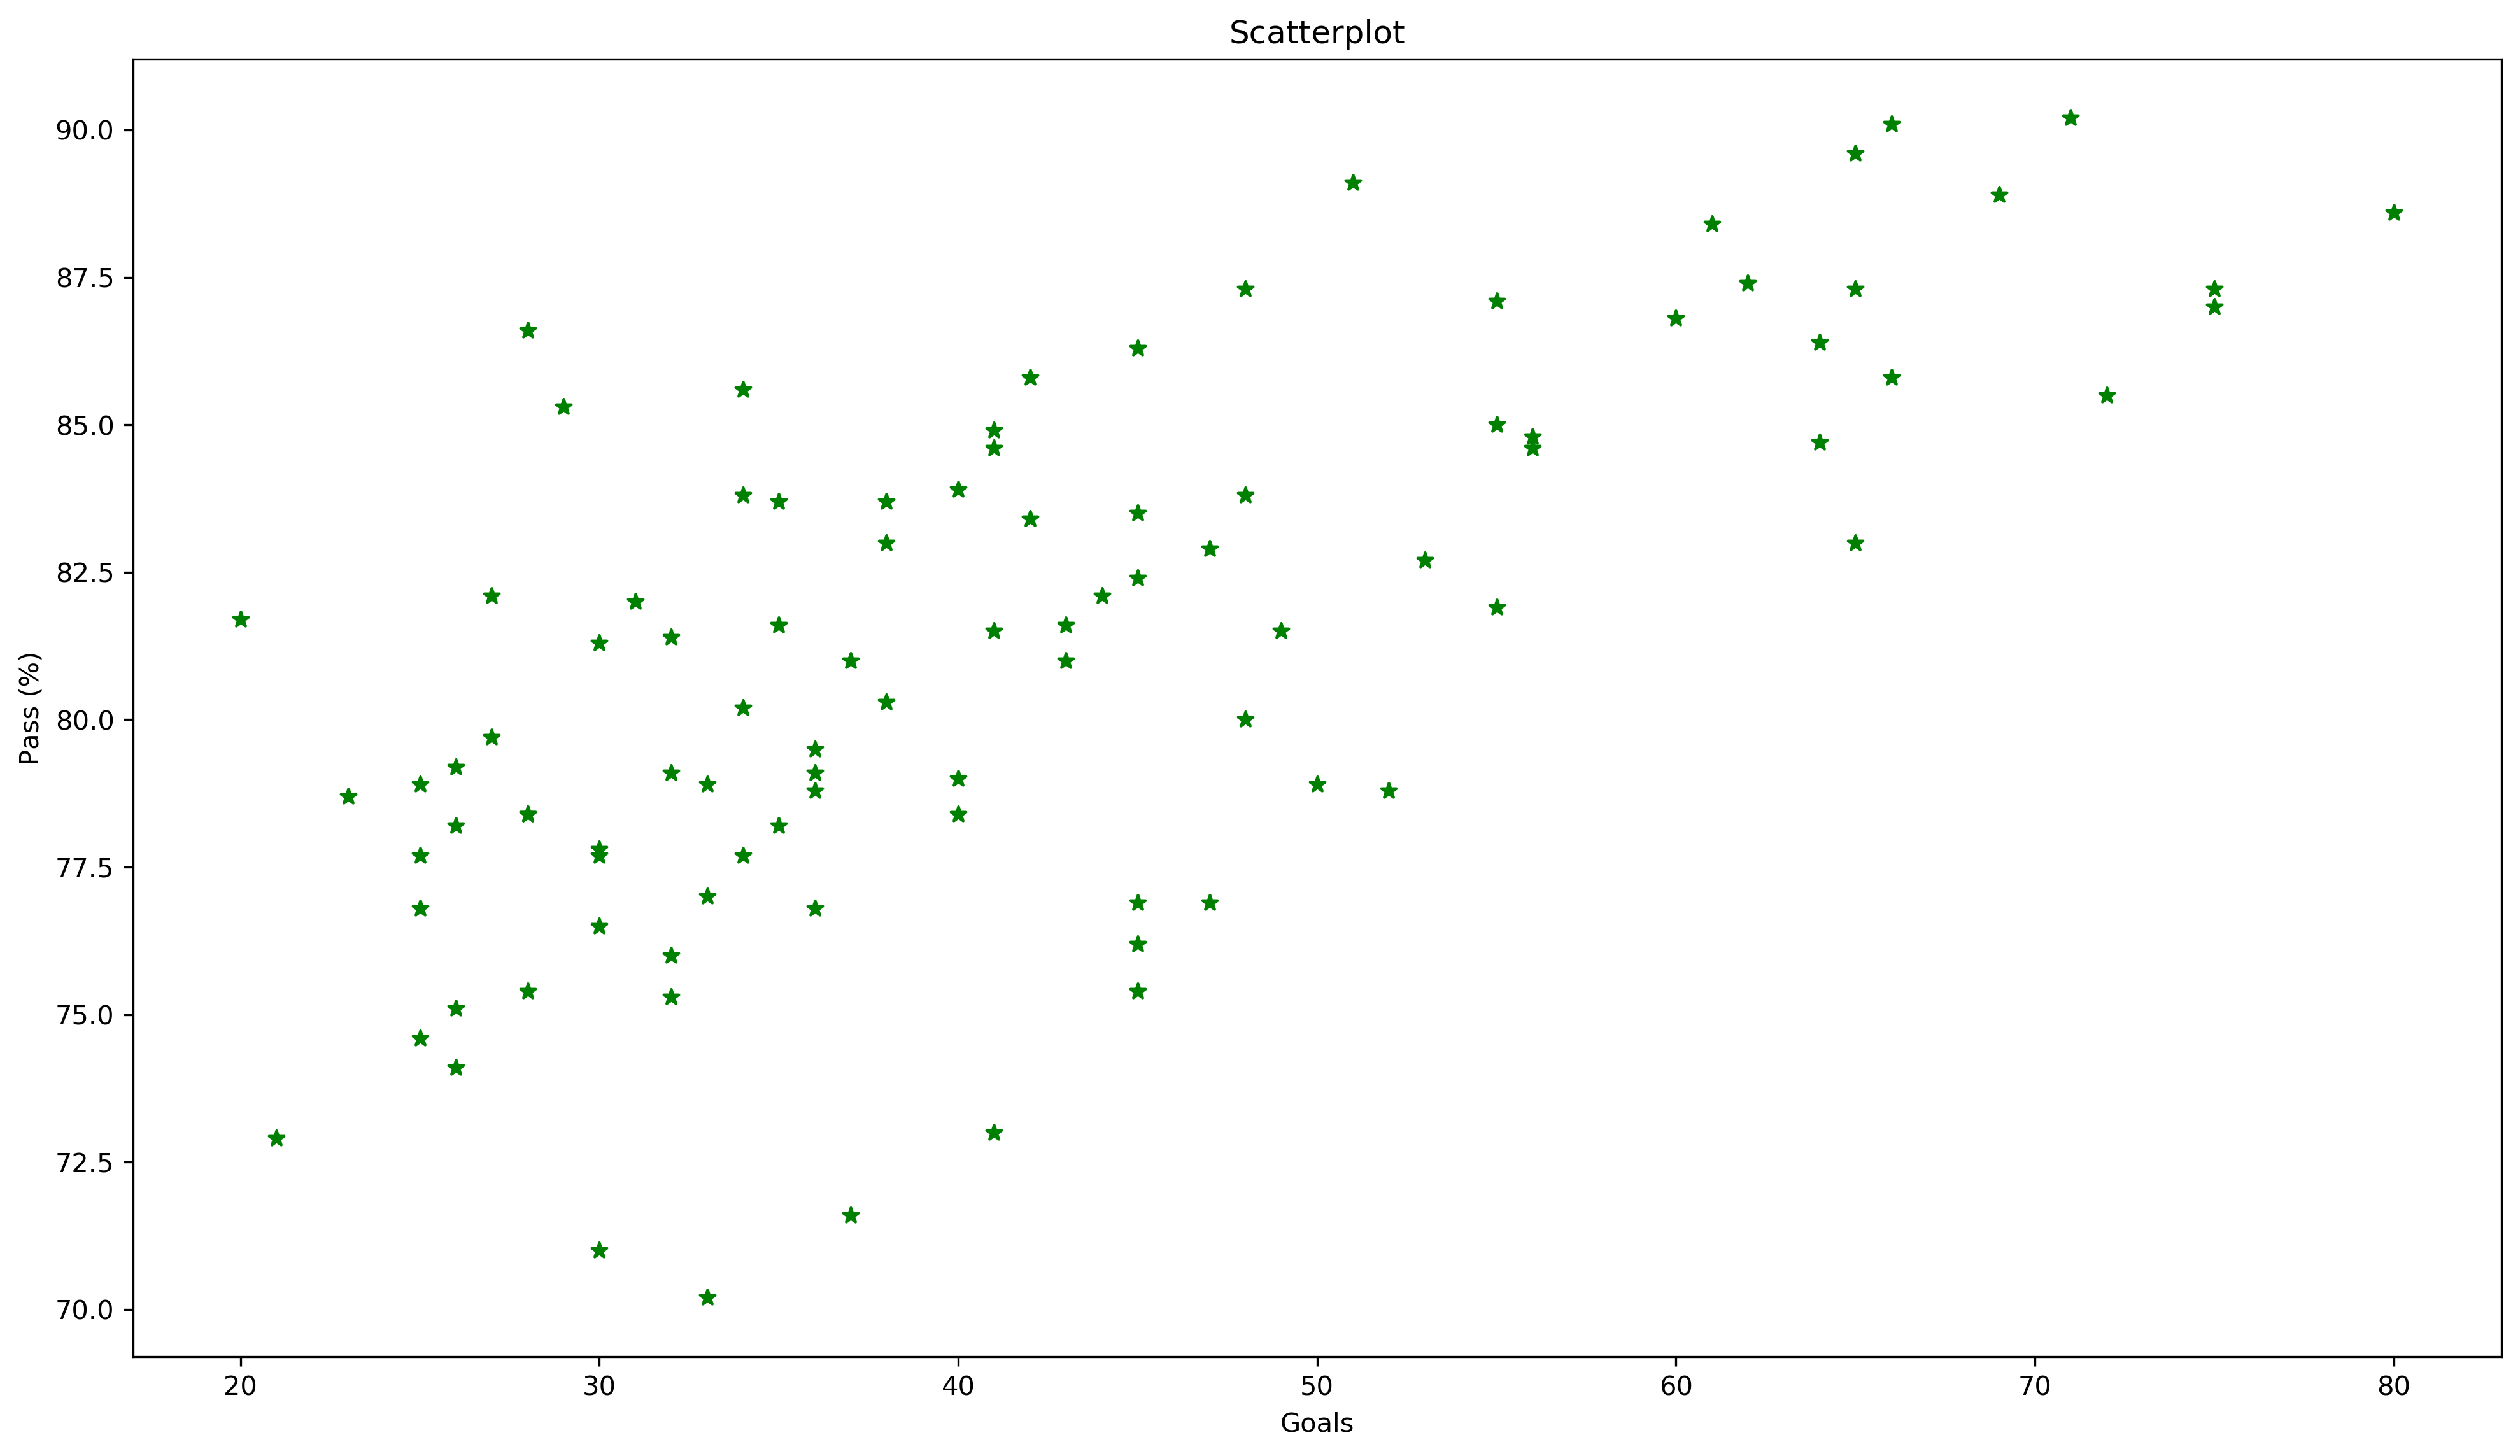

In [21]:
# дорабатываем график
# размер 16 на 9 дюймов, разрешение 300 точек на дюйм
# меняем тип маркера для точки и его цвет
# добавляем подписи

fig, ax = plt.subplots(figsize=(16, 9), dpi = 300)
ax.scatter(x, y, marker = "*", c = "green");
ax.set_title("Scatterplot");
ax.set_xlabel("Goals");
ax.set_ylabel("Pass (%)");

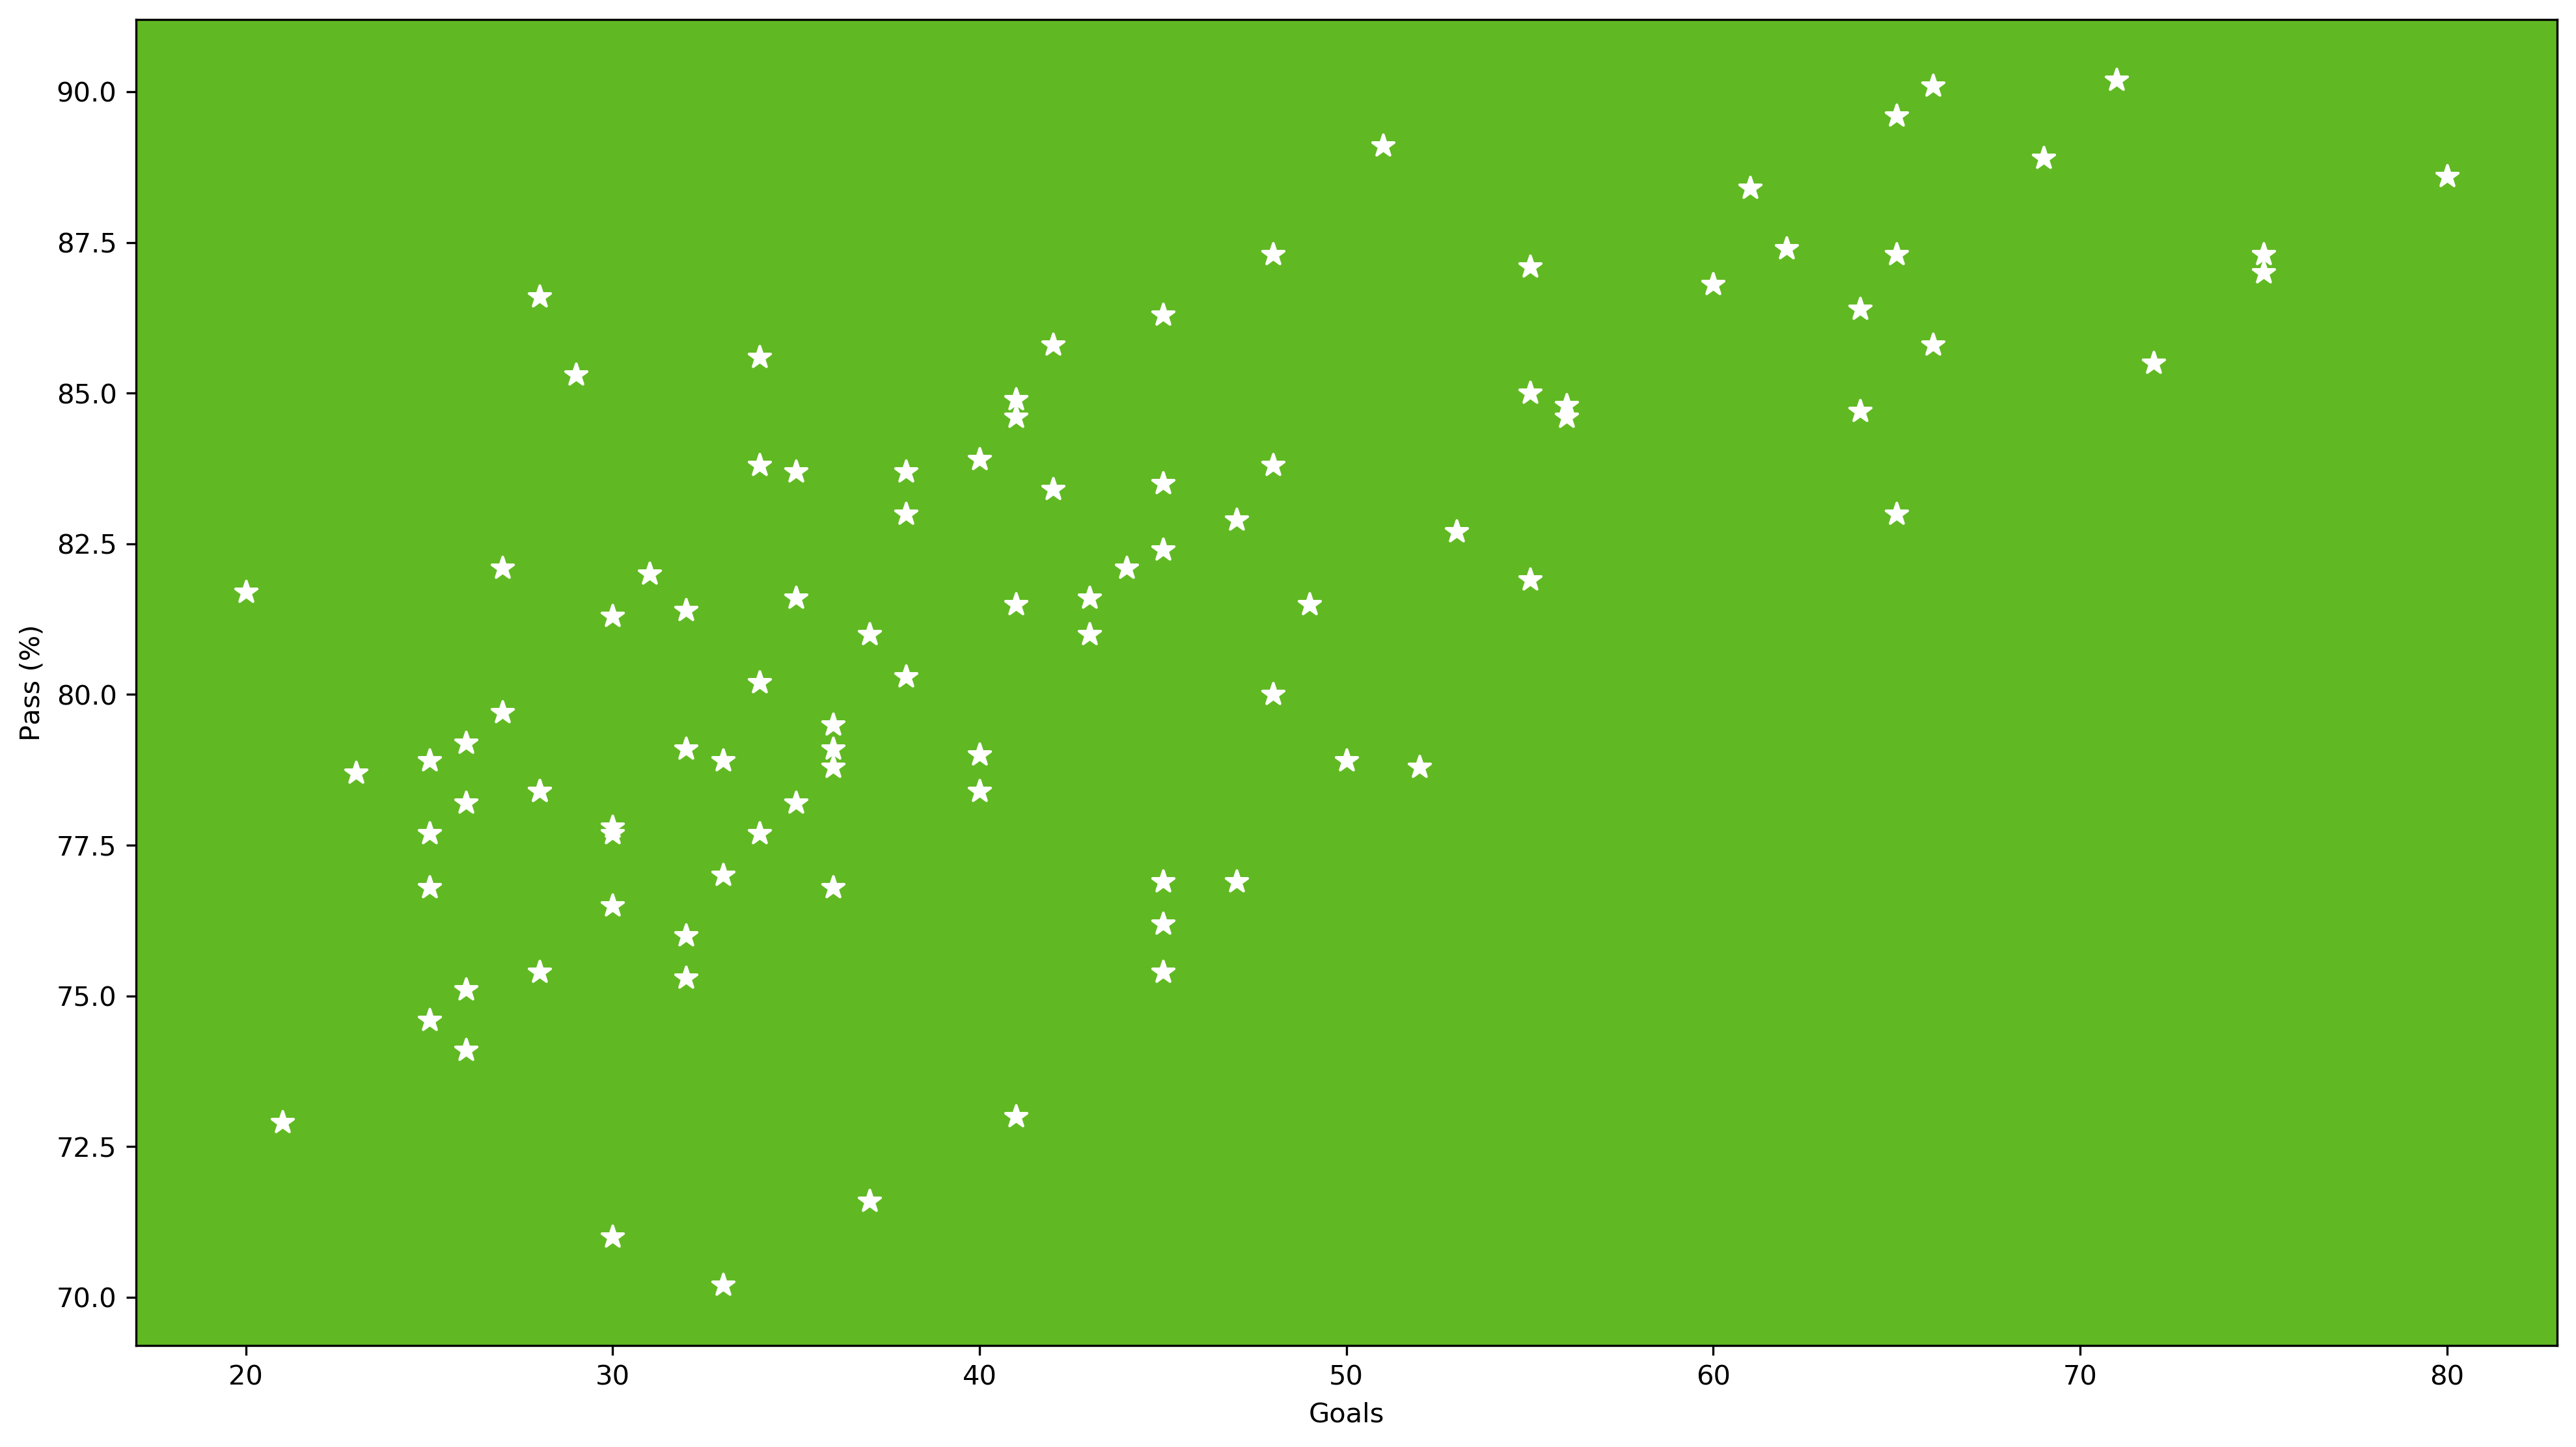

In [27]:
# немного повеселимся
# сделаем график в цветах футбольного поля
# точки побольше - s = 70

fig, ax = plt.subplots(figsize=(16, 9), dpi = 300)
ax.scatter(x, y, marker = "*", c = "white", s = 70);
ax.set_xlabel("Goals");
ax.set_ylabel("Pass (%)");

# код цвета field green

ax.set_facecolor('#60b922');

### Задача 5

Вычислите коэффициенты корреляции Пирсона и Спирмена между `Goals` и `Pass%` и проверьте, можно ли считать их статистически значимыми на 5%-ном уровне значимости.

In [29]:
from scipy import stats

In [30]:
# сам коэффициент и p-value
# p-value ~ 0 -> H0 об отсутствии связи отвергаем

stats.pearsonr(x, y)

(0.6800580101412415, 2.5418717874131905e-14)

In [31]:
# сам коэффициент и p-value
# p-value ~ 0 -> H0 об отсутствии связи отвергаем

stats.spearmanr(x, y)

SpearmanrResult(correlation=0.6591740361583373, pvalue=2.8410151208020916e-13)

In [32]:
# если значимость не важна, нужен только Пирсон,
# достаточно методов pandas

fin.corr()

,Goals,Shots pg,Discipline,Possession%,Pass%,AerialsWon,Rating
Goals,1.000000,0.756427,-0.224670,0.710057,0.680058,-0.364926,0.869629
Shots pg,0.756427,1.000000,-0.263761,0.722976,0.617787,-0.261412,0.794398
Discipline,-0.224670,-0.263761,1.000000,-0.187774,-0.311513,0.293816,-0.360254
Possession%,0.710057,0.722976,-0.187774,1.000000,0.884663,-0.499423,0.733324
Pass%,0.680058,0.617787,-0.311513,0.884663,1.000000,-0.738399,0.711720
AerialsWon,-0.364926,-0.261412,0.293816,-0.499423,-0.738399,1.000000,-0.369535
Rating,0.869629,0.794398,-0.360254,0.733324,0.711720,-0.369535,1.000000
